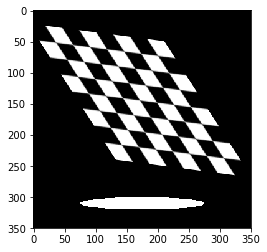

In [2]:
%matplotlib inline
import numpy as np
import scipy
import skimage
from matplotlib import pyplot as plt
from skimage.util.shape import view_as_blocks
from skimage import data
from skimage.transform import rescale, resize, downscale_local_mean
from skimage import feature
from skimage.transform import warp, AffineTransform
from skimage import io
from scipy.misc import imread, imsave, imresize
from PIL import Image

#img = np.array(Image.open('checkerboard.png').convert('L'))
img = io.imread('checkerboard.png')

# Performs greyscale conversion
# Necessary if the provide image is no greyscale image
image=skimage.color.rgb2gray(img)

plt.imshow(image,cmap='gray')
plt.show()



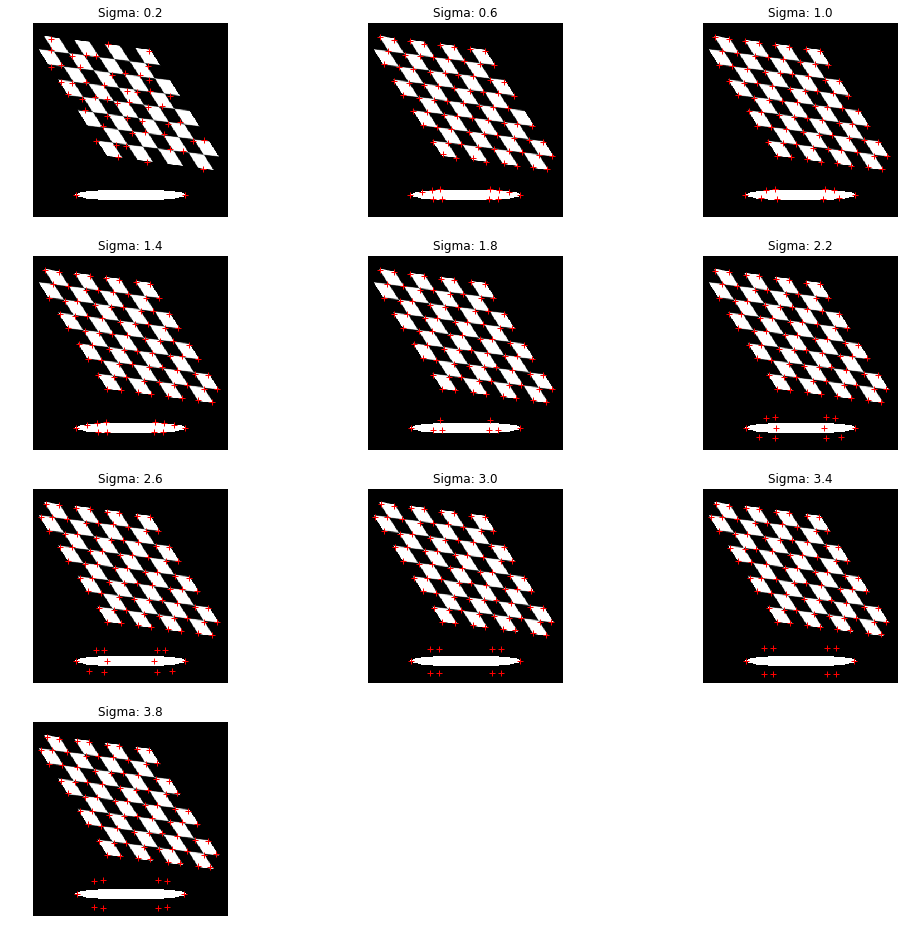

In [3]:
col = 3
row = 6
plotnr = 1


def plot(img, corners, title, row_index, col_index, plot_nr):
    plt.subplot(row_index, col_index, plot_nr)
    plt.axis('off')    
    plt.title(title)
    plt.imshow(image,cmap='gray')
    plt.plot( corners[:,1] , corners[:,0], '+r', markersize=6)

   
# Create a new figure to plot
plt.figure(figsize=(17, 25))
    
# Observe the impact of different sigma values
for sigma in np.arange(0.2, 4.0, 0.4):
    
    # k : float, optional 
    # Sensitivity factor to separate corners from edges, typically in range [0, 0.2].
    # Small values of k result in detection of sharp corners.  
    # method : {‘k’, ‘eps’}, optional
    corners = feature.corner_peaks(feature.corner_harris(image, sigma=sigma), min_distance=13,threshold_rel=0)
    
    plot(image, corners,"Sigma: " + str(sigma), row, col, plotnr)
    plotnr = plotnr + 1
    
    
    

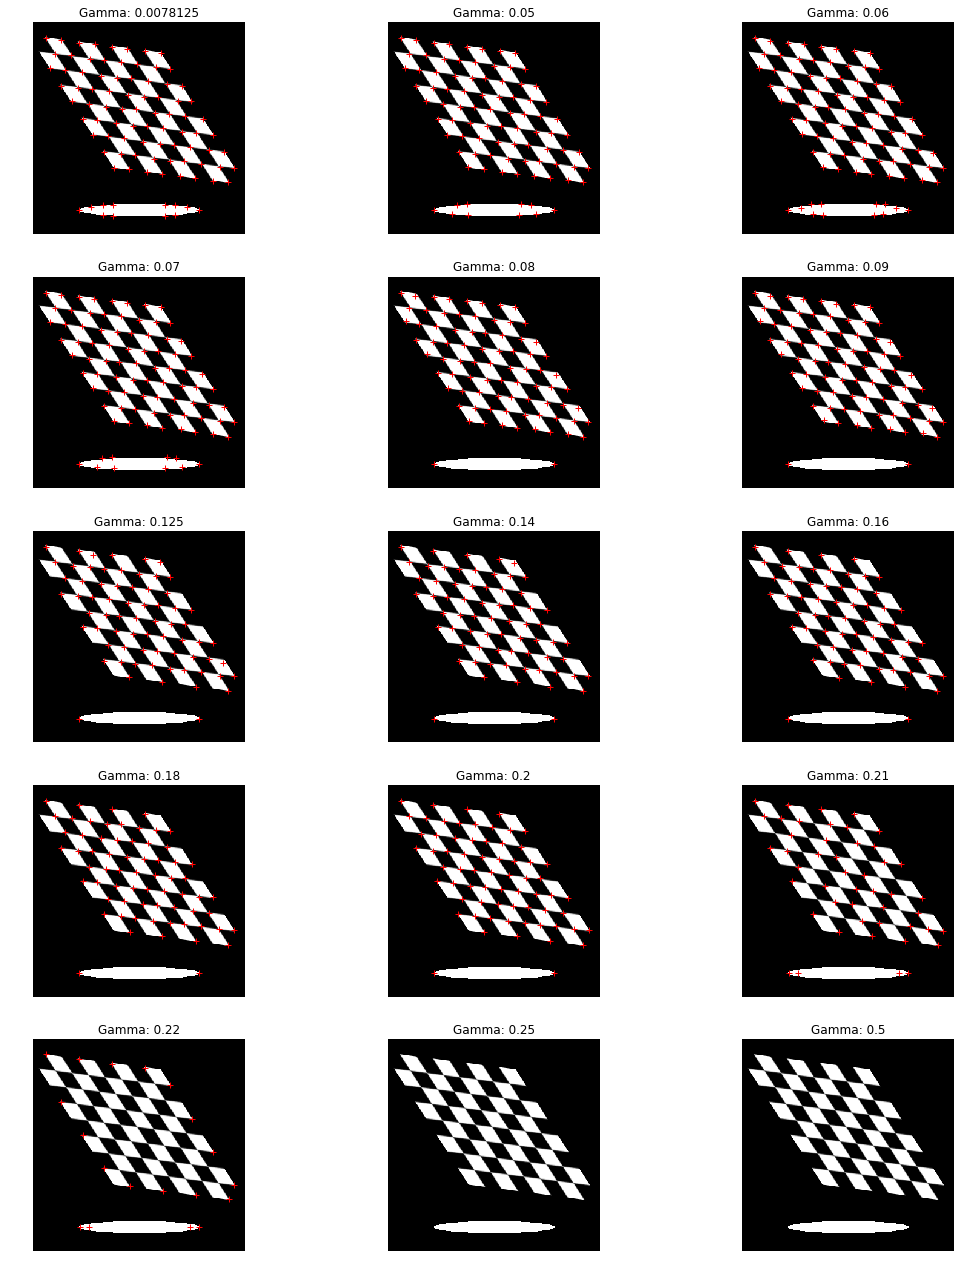

In [7]:
col = 3
row = 13
plotnr = 1

# Create a new figure to plot
plt.figure(figsize=(18, 60))

gammas = [0.0078125,0.05,0.06,0.07,0.08,0.09,0.125,0.14,0.16,0.18,0.2,0.21,0.22,0.250,0.5]

# Observe the impact of different sigma values
for gamma in gammas:
    
    corners = feature.corner_peaks(feature.corner_harris(image, sigma=1.0, k=gamma),min_distance=13,threshold_rel=0)
    
    plot(image, corners,"Gamma: " + str(gamma), row, col, plotnr)
    plotnr = plotnr + 1
    

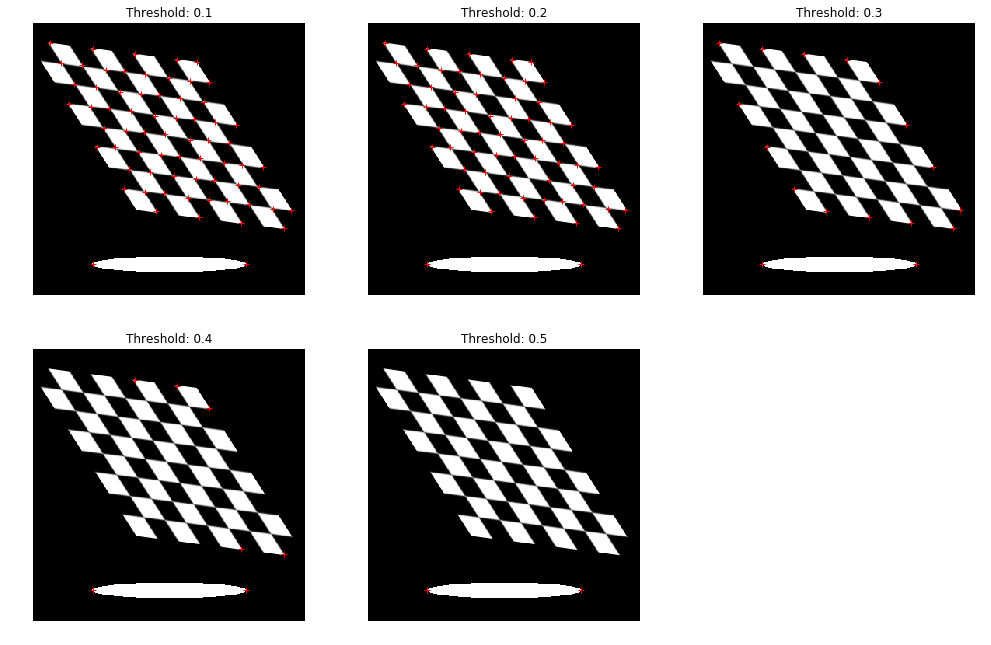

In [8]:
col = 3
row = 3
plotnr = 1


def plot(img, corners, title, row_index, col_index, plot_nr):
    plt.subplot(row_index, col_index, plot_nr)
    plt.axis('off')    
    plt.title(title)
    plt.imshow(image,cmap='gray')
    plt.plot( corners[:,1] , corners[:,0], '+r', markersize=6)

   
# Create a new figure to plot
plt.figure(figsize=(17, 17))
    
# Observe the impact of different sigma values
for threshold in np.arange(0.1, 0.6, 0.1):
    
    # k : float, optional 
    # Sensitivity factor to separate corners from edges, typically in range [0, 0.2].
    # Small values of k result in detection of sharp corners.  
    # method : {‘k’, ‘eps’}, optional
    corners = feature.corner_peaks(feature.corner_harris(image, sigma=1.0), min_distance=13,threshold_rel=threshold)
    
    plot(image, corners,"Threshold: " + str(threshold), row, col, plotnr)
    plotnr = plotnr + 1
    
    
    